In [11]:
import requests
import sys
import pandas as pd
import numpy as np
from scipy import sparse
from io import StringIO
import networkscience as ns
from matplotlib import pyplot as plt
import seaborn as sns

In [12]:
# reading all datasets
country19_df = pd.read_csv('data\Erasmus19.csv', sep=';',low_memory=False, header=0, encoding='utf8')
country18_df = pd.read_csv('data\Erasmus18.csv', sep=';',low_memory=False, header=0, encoding='utf8')
country17_df = pd.read_csv('data\Erasmus17.csv', sep=';',low_memory=False, header=0, encoding='utf8')
country16_df = pd.read_csv('data\Erasmus16.csv', sep=';',low_memory=False, header=0, encoding='utf8')
country15_df = pd.read_csv('data\Erasmus15.csv', sep=';',low_memory=False, header=0, encoding='utf8')
country14_df = pd.read_csv('data\Erasmus14.csv', sep=';',low_memory=False, header=0, encoding='utf8')

# merging all datasets
df = country19_df.append(country18_df)
df = df.append(country17_df)
df = df.append(country16_df)
df = df.append(country15_df)
df = df.append(country14_df)

In [13]:
# reply = requests.get('https://gitlab.com/data.europa.eu/data-provider-repository/-/raw/master/dg-eac/2021.05.11%20KA1%20mobilities%20eligible%20finalised%20started%20in%202018.csv?inline=false')
# reply.encoding = 'utf-8'
# csv_data = reply.text
# df = pd.read_csv(StringIO(csv_data), sep=';',low_memory=False, header=0)

for i, name in enumerate(df.columns):
    print(i, name)
df.drop(columns=['GroupLeader', 'Sending Organisation Erasmus Code', 'Receiving Organisation Erasmus Code'], inplace=True)
c_df = df.copy() # we will use it for later (country network)

0 Project Reference
1 Academic Year
2 Mobility Start Month
3 Mobility End Month
4 Mobility Duration
5 Activity (mob)
6 Field of Education
7 Participant Nationality
8 Education Level
9 Participant Gender
10 Participant Profile
11 Special Needs
12 Fewer Opportunities
13 GroupLeader
14 Participant Age
15 Sending Country Code
16 Sending City
17 Sending Organization
18 Sending Organisation Erasmus Code
19 Receiving Country Code
20 Receiving City
21 Receiving Organization
22 Receiving Organisation Erasmus Code
23 Participants


In [14]:
pd.options.display.max_columns=21
display(df)

,Project Reference,Academic Year,Mobility Start Month,Mobility End Month,Mobility Duration,Activity (mob),Field of Education,Participant Nationality,Education Level,Participant Gender,Participant Profile,Special Needs,Fewer Opportunities,Participant Age,Sending Country Code,Sending City,Sending Organization,Receiving Country Code,Receiving City,Receiving Organization,Participants
0,2016-3-EE01-KA105-034520,2019-2020,2019-03,2019-04,33.0,European Voluntary Service - Partner Countries,? Unknown ?,EE,??? - ? Unknown ?,Female,Learner,No,No,18,EE,TALLINN,MTÜ NOORTEVAHETUSE ARENGU ÜHING ESTYES,RU,Nizhny Novgorod,Interregional youth social movement of support...,1
1,2016-3-UK01-KA105-035288,2019-2020,2019-02,2019-03,56.0,European Voluntary Service - Partner Countries,? Unknown ?,IT,??? - ? Unknown ?,Male,Learner,No,Yes,29,IT,TRAPPETO,CESIE,UK,Cardiff,Language Academy Wales,1
2,2017-1-AT01-KA101-034705,2019-2020,2019-04,2019-04,6.0,Structured Courses/Training Events,Languages,AT,??? - ? Unknown ?,Female,Staff,No,No,39,AT,Hollabrunn,HTL Für Lebensmitteltechnologie-Lebensmittelsi...,EL,Heraklion,Institut für europäische Lehrerfortbildung UG ...,1
3,2017-1-AT01-KA101-034727,2019-2020,2019-02,2019-02,15.0,Structured Courses/Training Events,Teacher training with subject specialization,AT,??? - ? Unknown ?,Female,Staff,No,No,27,AT,Weiz,BHAK/BHAS Weiz,IE,Dublin,Atlantic Language Dublin,1
4,2017-1-AT01-KA101-034774,2019-2020,2019-02,2019-02,5.0,Structured Courses/Training Events,Education,AT,??? - ? Unknown ?,Female,Staff,No,No,26,AT,Linz,Bundesbildungsanstalt für Elementarpädagogik,MT,St.Julian's,Executive Training Institute Ltd.,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235409,2014-3-SE02-KA105-001055,2014-2015,2014-07,2014-07,9.0,Mobility of youth workers - Partner Countries,? Unknown ?,SI,??? - ? Unknown ?,Male,Staff,No,No,-1,SI,Slovenj Gradec,JZ Spotur,GE,Tbilisi,"Non Formal Education Youth Centre ""Sunny House""",1
235410,2014-3-SE02-KA105-001055,2014-2015,2014-07,2014-07,9.0,Mobility of youth workers - Partner Countries,? Unknown ?,SI,??? - ? Unknown ?,Male,Staff,No,No,27,SI,Slovenj Gradec,JZ Spotur,GE,Tbilisi,"Non Formal Education Youth Centre ""Sunny House""",1
235411,2014-3-SE02-KA105-001055,2014-2015,2014-07,2014-07,9.0,Mobility of youth workers - Partner Countries,? Unknown ?,TR,??? - ? Unknown ?,Female,Staff,No,No,25,TR,Istanbul,Toplum Gonulluleri Vakfi,GE,Tbilisi,"Non Formal Education Youth Centre ""Sunny House""",1
235412,2014-3-SE02-KA105-001055,2014-2015,2014-07,2014-07,9.0,Mobility of youth workers - Partner Countries,? Unknown ?,UA,??? - ? Unknown ?,Female,Staff,No,No,22,UA,Kyiv,All-Ukrainian Association for Youth Co-operati...,GE,Tbilisi,"Non Formal Education Youth Centre ""Sunny House""",1


In [15]:
mobility_df = df[df[df.columns[10]]=='Learner']
mobility_df = mobility_df[mobility_df['Activity (mob)'].str.contains('Student')]
mobility_df = mobility_df[~mobility_df['Activity (mob)'].str.contains('traineeship')]
mobility_df = mobility_df.loc[:, df.columns[np.array((16, 19, 20, 5, 15, 18))]]
print((mobility_df['Receiving Organization'].nunique()))
print((mobility_df['Sending Organization'].nunique()))

5410
6505


In [16]:
mobility_df['Sending Organization'] = mobility_df['Sending Organization'].str.upper()
mobility_df['Receiving Organization'] = mobility_df['Receiving Organization'].str.upper()

print('Number of Receiving Universities: ',(mobility_df['Receiving Organization'].nunique()))
print('Number of Sending Universities: ',(mobility_df['Sending Organization'].nunique()))
mobility_df

Number of Receiving Universities:  5220
Number of Sending Universities:  6253


,Sending Organization,Receiving Organization,Participants,Activity (mob),Sending City,Receiving City
276,CHINA FOREIGN AFFAIRS UNIVERSITY,DIPLOMATISCHE AKADEMIE WIEN,1,Student mobility for Studies To/From Partner C...,Beijing,WIEN
277,FACHHOCHSCHULE DES BFI WIEN GESELLSCHAFT M.B.H.,SOUTHERN FEDERAL UNIVERSITY,1,Student mobility for Studies To/From Partner C...,Wien,ROSTOV ON DON
278,SOUTHERN FEDERAL UNIVERSITY,FACHHOCHSCHULE DES BFI WIEN GESELLSCHAFT M.B.H.,1,Student mobility for Studies To/From Partner C...,ROSTOV ON DON,Wien
279,FEDERAL STATE BUDGET EDUCATIONAL INSTITUTION O...,FACHHOCHSCHULE DES BFI WIEN GESELLSCHAFT M.B.H.,1,Student mobility for Studies To/From Partner C...,SAINT PETERSBURG,Wien
280,SOUTHERN FEDERAL UNIVERSITY,FACHHOCHSCHULE DES BFI WIEN GESELLSCHAFT M.B.H.,1,Student mobility for Studies To/From Partner C...,ROSTOV ON DON,Wien
...,...,...,...,...,...,...
214990,OXFORD BROOKES UNIVERSITY,POLITECNICO DI TORINO,1,Student mobility for studies between Programme...,OXFORD,TORINO
214991,OXFORD BROOKES UNIVERSITY,POLITECNICO DI TORINO,1,Student mobility for studies between Programme...,OXFORD,TORINO
214992,OXFORD BROOKES UNIVERSITY,UNIVERSIDAD DE ZARAGOZA,1,Student mobility for studies between Programme...,OXFORD,ZARAGOZA
214993,OXFORD BROOKES UNIVERSITY,POLITECNICO DI TORINO,1,Student mobility for studies between Programme...,OXFORD,TORINO


In [17]:
nodes = np.array(list(set.union(set(mobility_df.loc[:, mobility_df.columns[0]]), set(mobility_df.loc[:, mobility_df.columns[1]]))))
node_position = {}
for i, name in enumerate(nodes):
    node_position[name] = i
nodes_df = pd.DataFrame({'Nodes': nodes})
mobility_df['SendId'] = (np.array(list(map(lambda x: node_position[x], mobility_df['Sending Organization']))))
mobility_df['RecId']= (np.array(list(map(lambda x: node_position[x], mobility_df['Receiving Organization']))))
# Adjacency matrix
adj_matrix_crs = sparse.csr_matrix((nodes.size, nodes.size),dtype=int)
adj_matrix_csc = sparse.csc_matrix((nodes.size, nodes.size),dtype=int)

In [18]:
mobility_serie = mobility_df.groupby(['SendId', 'RecId']).sum()
row = np.array(mobility_serie.index.get_level_values(1).tolist())
col = np.array(mobility_serie.index.get_level_values(0).tolist())
val = mobility_serie.values
adj_matrix_crs = sparse.csr_matrix((val.flatten(), (row, col)), shape=(nodes.size, nodes.size))

# cercasi 70 Gb di ram, no perditempo
# ns.visualize_adj(adj_matrix_crs)

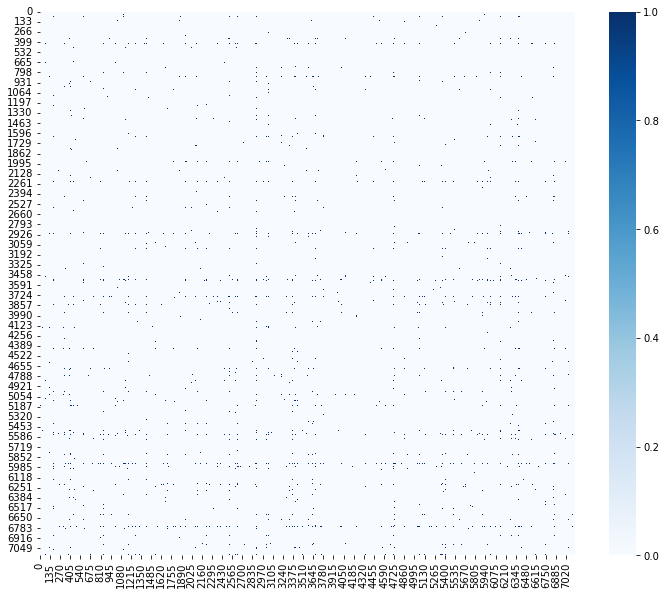

In [19]:
fig, ax = plt.subplots(1,1,figsize=(12,10))
a_adj = adj_matrix_crs.toarray()
a_adj[a_adj>1] = 1
sns.heatmap(a_adj, cmap="Blues", ax=ax)
plt.show()

In [20]:
mobility_df.rename({'Sending Organization': 'source','Receiving Organization': 'target', 'Participants':'weight'},axis=1, inplace=True)
uni_cities = mobility_df.copy()
adj_matrix_crs, mobility_df, nodes_df = ns.keep_giant(ns.find_components(adj_matrix_crs, nodes_df), mobility_df)

### Degree distribution

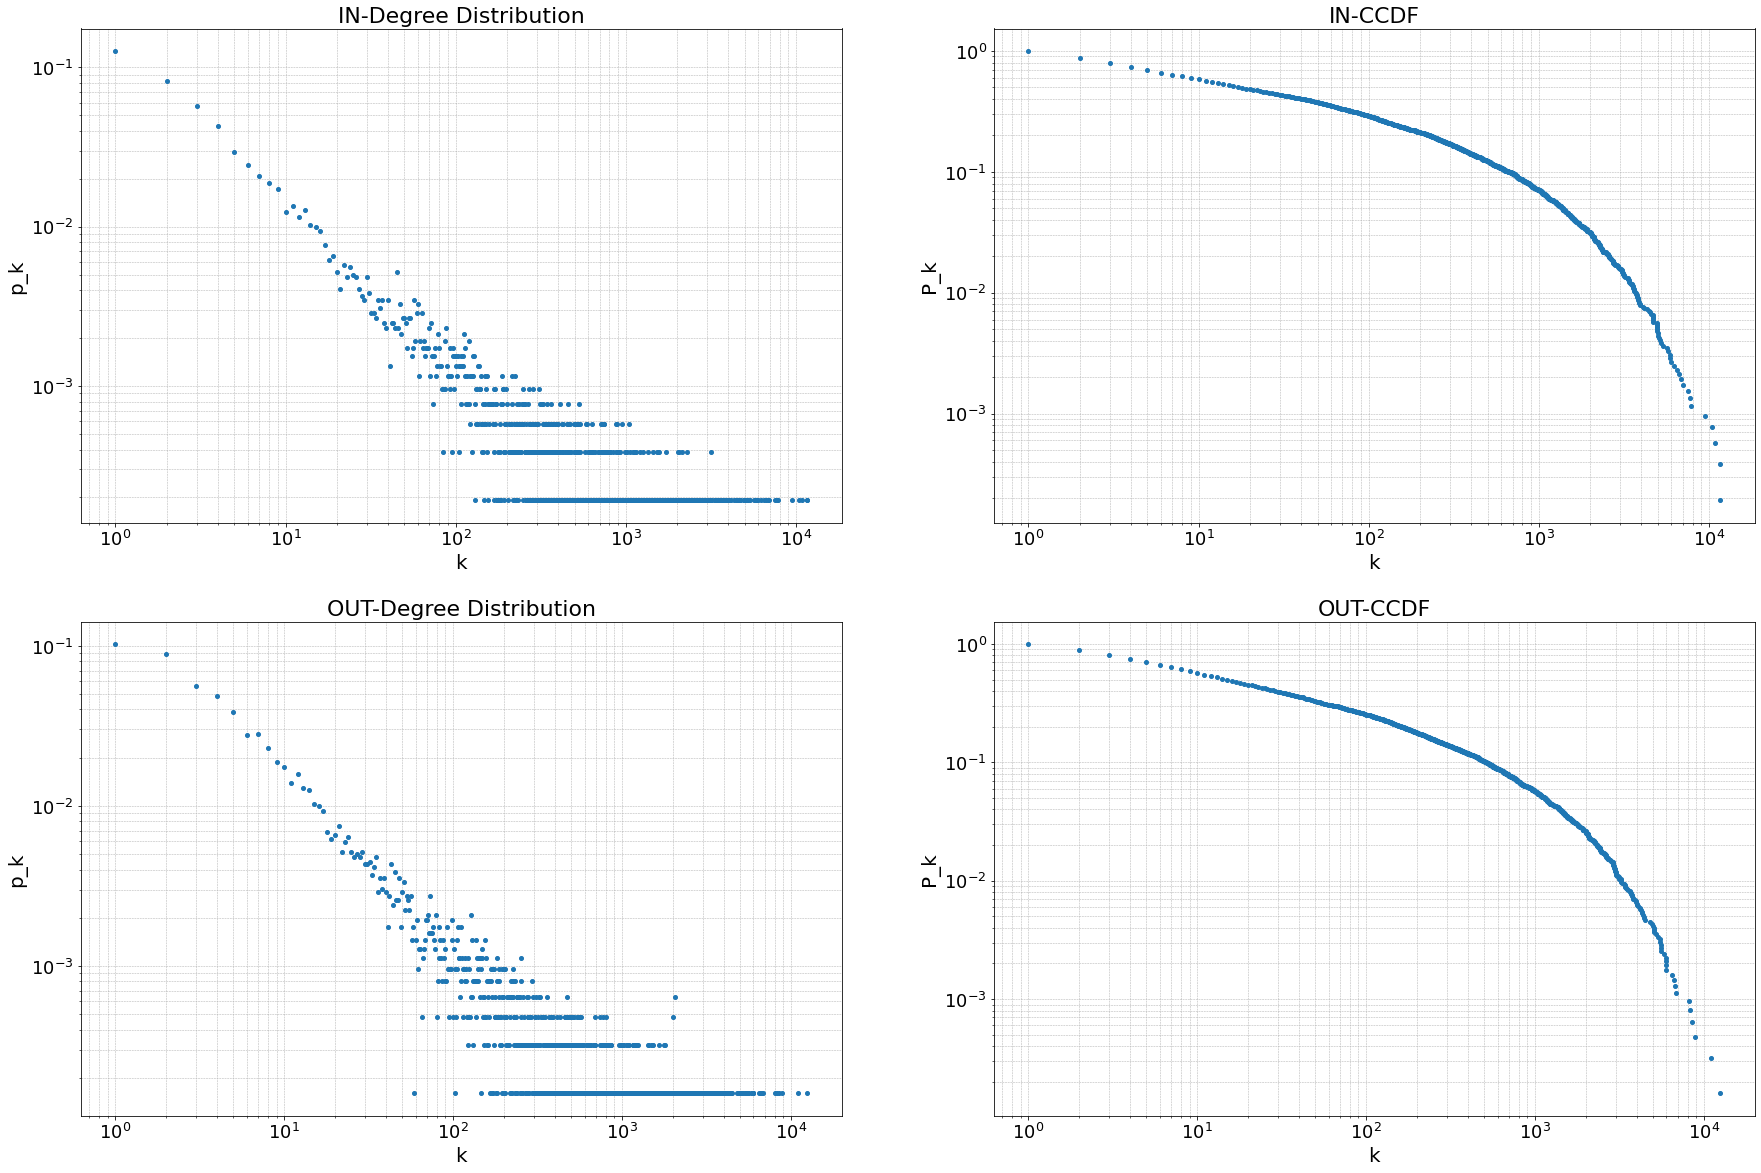

Top 10 for in degree


,Nodes,in degree
4861,UNIVERSITAT DE VALENCIA,11611
4499,ALMA MATER STUDIORUM - UNIVERSITA DI BOLOGNA,11540
3831,UNIVERSIDAD DE GRANADA,10809
5912,UNIVERSIDADE DE LISBOA,10424
5125,UNIVERSIDAD COMPLUTENSE DE MADRID,9414
5591,UNIVERSITAT POLITECNICA DE VALENCIA,7854
1496,UNIVERZA V LJUBLJANI,7762
810,KATHOLIEKE UNIVERSITEIT LEUVEN,7487
1724,UNIVERSIDAD DE SEVILLA,6978
4622,NORGES TEKNISK-NATURVITENSKAPELIGE UNIVERSITET...,6818


Top 10 for out degree


,Nodes,out degree
4499,ALMA MATER STUDIORUM - UNIVERSITA DI BOLOGNA,12477
3831,UNIVERSIDAD DE GRANADA,11026
4861,UNIVERSITAT DE VALENCIA,8866
5125,UNIVERSIDAD COMPLUTENSE DE MADRID,8467
1653,UNIVERSITA DEGLI STUDI DI PADOVA,8302
6734,UNIVERSITA DEGLI STUDI DI ROMA LA SAPIENZA,8102
810,KATHOLIEKE UNIVERSITEIT LEUVEN,6867
2877,UNIVERSIDAD DEL PAIS VASCO/ EUSKAL HERRIKO UNI...,6700
4495,UNIVERSITA DEGLI STUDI DI TORINO,6664
677,UNIVERSIDAD POLITECNICA DE MADRID,6446


In [21]:
scores = ns.degree_disribution(adj_matrix_crs, nodes_df, print_graph=True)
ns.display_top_n(scores, 10, 'in degree')
ns.display_top_n(scores, 10, 'out degree')

### Estimating $\gamma$ 

In [22]:
from collections import Counter
from statistics import mean

d_in = scores['in degree']
d_in = d_in[d_in>0]
d_out = scores['out degree']
d_out = d_out[d_out>0]
kmin = 100
d2_in = d_in[d_in>kmin]
d2_out = d_out[d_out>kmin]

sorted_d = sorted(d_in)
occurrence = Counter(sorted_d)
x_in = list(occurrence.keys())
y_in = list(occurrence.values())
y_in = y_in/np.sum(y_in)

sorted_d = sorted(d_out)
occurrence = Counter(sorted_d)
x_out = list(occurrence.keys())
y_out = list(occurrence.values())
y_out = y_out/np.sum(y_out)

Pk_in = 1 - np.cumsum(y_in)
Pk_in[-1] = 1 
Pk_in = sorted(Pk_in, reverse = True)
Pk_out = 1 - np.cumsum(y_out)
Pk_out[-1] = 1 
Pk_out = sorted(Pk_out, reverse = True)

In [23]:
ga_in = 1 + 1/mean(np.array(np.log(d2_in/kmin)))
ga_out = 1 + 1/mean(np.array(np.log(d2_out/kmin)))
C_in = (ga_in-1)*kmin**(ga_in-1) # normalization condition
C_out = (ga_out-1)*kmin**(ga_out-1)

pos_in = np.argmax(np.array(x_in)>=kmin)
pos_out = np.argmax(np.array(x_out)>=kmin)

P_kmin_in = Pk_in[pos_in] # constant value that shifts the line where the data are placed
pk_in = C_in*P_kmin_in*x_in**-ga_in
Pk_est_in = C_in*P_kmin_in*x_in**(-(ga_in-1))/(ga_in-1) 

P_kmin_out = Pk_out[pos_out] # constant value that shifts the line where the data are placed
pk_out = C_out*P_kmin_out*x_out**-ga_out
Pk_est_out = C_out*P_kmin_out*x_out**(-(ga_out-1))/(ga_out-1) 

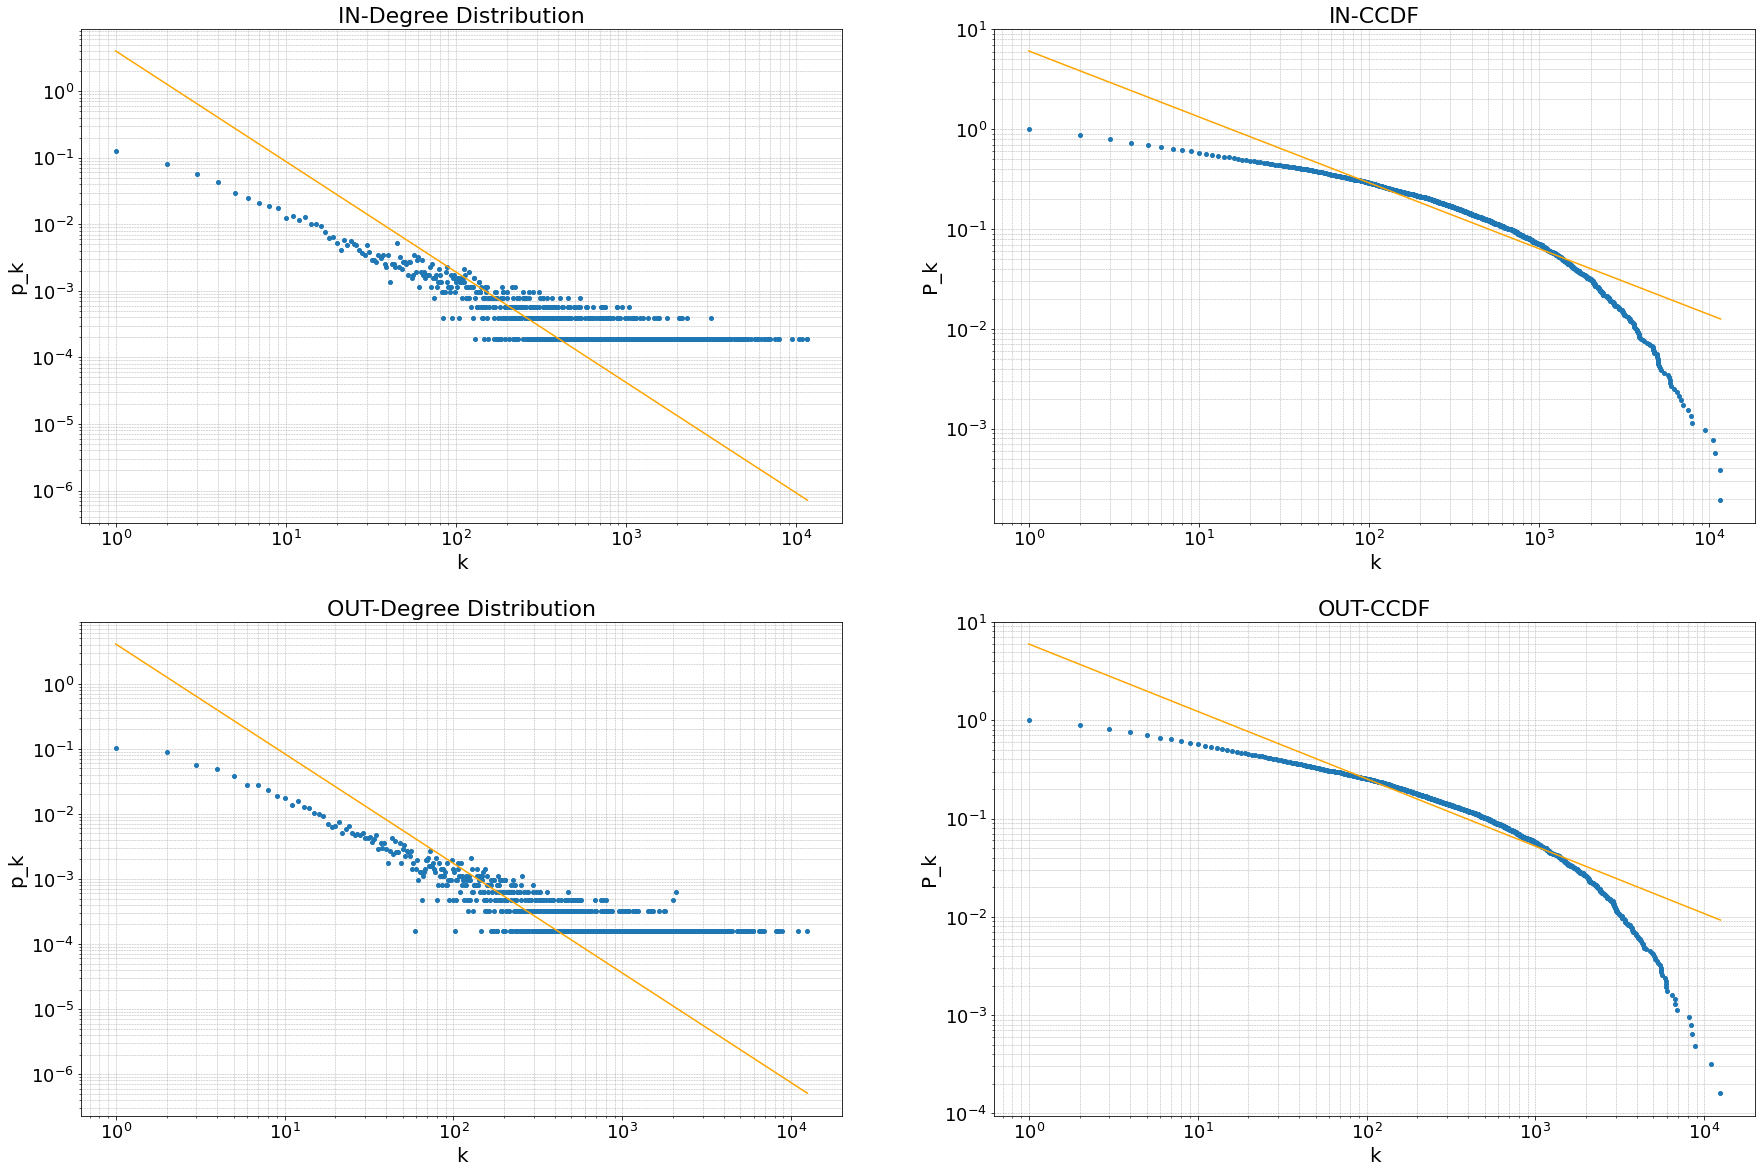

In [24]:
fig, ax = plt.subplots(2, 2, figsize = (30, 20))

def plot_gamma(ax, x, y, title, p, cumulative=False):
    ax.loglog(x, y, 'o', markersize = 4)
    ax.loglog(x, p, color='orange')
    ax.grid(which='both', linestyle='--', linewidth=0.5)
    ax.set_title(title, size = 22)
    ax.set_xlabel("k", size = 20)
    if cumulative:
        ax.set_ylabel("P_k", size = 20)
    else:
        ax.set_ylabel("p_k", size = 20)
    ax.tick_params(labelsize=18)
    ax.tick_params(labelsize=18)

plot_gamma(ax[0,0], x_in, y_in, "IN-Degree Distribution", pk_in)
plot_gamma(ax[0,1], x_in, Pk_in, "IN-CCDF", Pk_est_in, True)
plot_gamma(ax[1,0], x_out, y_out, "OUT-Degree Distribution", pk_out)
plot_gamma(ax[1,1], x_out, Pk_out, "OUT-CCDF", Pk_est_out, True)
plt.show()

### Estimating $\gamma$ through a linear fit with log binning

In [25]:
# Log binning 
nbins = 20
bins = np.logspace(0, 3.3, nbins)

hist_in = np.histogram(d_in, bins=bins, density=True)
hist_out = np.histogram(d_out, bins=bins, density=True)
logbin_p_k_in = hist_in[0]
logbin_p_k_out = hist_out[0]
middle_bins = np.sqrt( np.delete(bins, 0) * np.delete(bins, nbins-1) )

mask = np.log10(middle_bins) > np.log10(kmin)
x = np.log10( middle_bins[mask] )
y_in = np.log10( logbin_p_k_in[mask] )
y_out = np.log10( logbin_p_k_out[mask] )

# Linear fit
params_in = np.polyfit(x, y_in, deg =1)
params_out = np.polyfit(x, y_out, deg =1)
lin_gamma_in = -params_in[0]
lin_gamma_out = -params_out[0]

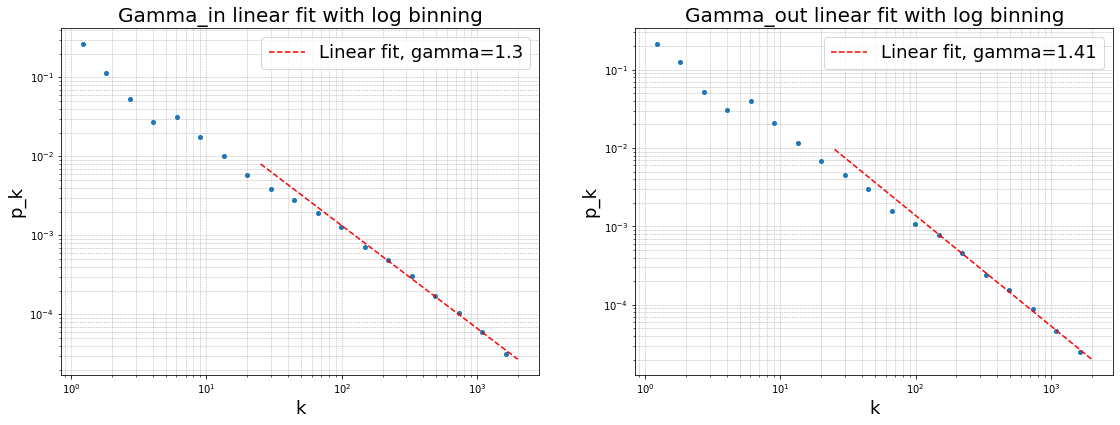

In [26]:
plt.figure(figsize=(60, 60))
plt.subplot(8, 6, 1)
plt.loglog(middle_bins, logbin_p_k_in , 'o', markersize = 4)
plt.grid(which='both', linestyle='--', linewidth=0.5)
plt.title("Gamma_in linear fit with log binning", size = 20)
plt.xlabel("k", size = 18)
plt.ylabel("p_k", size = 18)
x2 = np.logspace(1.4,3.3,100)
y2 = np.full( 100, 10**(params_in[1])*x2**(-lin_gamma_in) ) 
plt.plot(x2,y2, label ="Linear fit, gamma="+str( np.round(lin_gamma_in,2) ), color="red", linestyle="--")
plt.legend(fontsize=18)

plt.subplot(8, 6, 2)
plt.loglog(middle_bins, logbin_p_k_out , 'o', markersize = 4)
plt.grid(which='both', linestyle='--', linewidth=0.5)
plt.title("Gamma_out linear fit with log binning", size = 20)
plt.xlabel("k", size = 18)
plt.ylabel("p_k", size = 18)
x2 = np.logspace(1.4,3.3,100)
y2 = np.full( 100, 10**(params_out[1])*x2**(-lin_gamma_out) ) 
plt.plot(x2,y2, label ="Linear fit, gamma="+str( np.round(lin_gamma_out,2) ), color="red", linestyle="--")
plt.legend(fontsize=18)

plt.show()

### HITS (NetworkX)

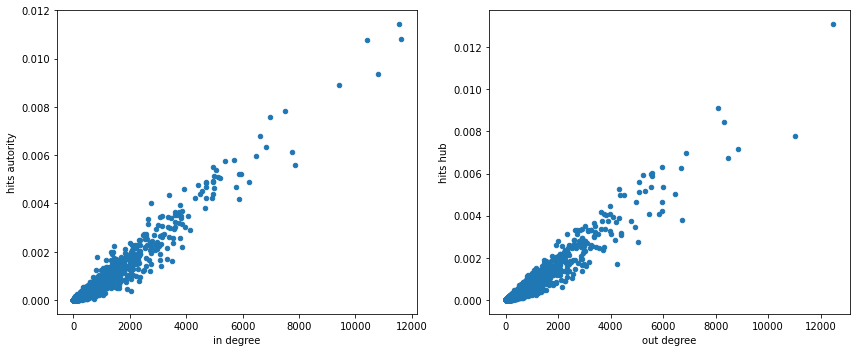

Top 10 for hits hub


,Nodes,hits hub
4499,ALMA MATER STUDIORUM - UNIVERSITA DI BOLOGNA,0.013100
6734,UNIVERSITA DEGLI STUDI DI ROMA LA SAPIENZA,0.009089
1653,UNIVERSITA DEGLI STUDI DI PADOVA,0.008444
3831,UNIVERSIDAD DE GRANADA,0.007785
4861,UNIVERSITAT DE VALENCIA,0.007185
810,KATHOLIEKE UNIVERSITEIT LEUVEN,0.006954
5125,UNIVERSIDAD COMPLUTENSE DE MADRID,0.006739
5912,UNIVERSIDADE DE LISBOA,0.006314
4495,UNIVERSITA DEGLI STUDI DI TORINO,0.006247
3357,UNIWERSYTET WARSZAWSKI,0.006037


Top 10 for hits autority


,Nodes,hits autority
4499,ALMA MATER STUDIORUM - UNIVERSITA DI BOLOGNA,0.011440
4861,UNIVERSITAT DE VALENCIA,0.010822
5912,UNIVERSIDADE DE LISBOA,0.010794
3831,UNIVERSIDAD DE GRANADA,0.009381
5125,UNIVERSIDAD COMPLUTENSE DE MADRID,0.008920
810,KATHOLIEKE UNIVERSITEIT LEUVEN,0.007841
1724,UNIVERSIDAD DE SEVILLA,0.007591
3565,UNIVERSITAT DE BARCELONA,0.006804
4622,NORGES TEKNISK-NATURVITENSKAPELIGE UNIVERSITET...,0.006340
1496,UNIVERZA V LJUBLJANI,0.006119


In [27]:
df = ns.hits_alg(adj_matrix_crs, nodes_df, score_df=scores, print_graph=True)
scores = pd.merge(scores, df, on='Nodes')

ns.display_top_n(scores, 10, 'hits hub')
ns.display_top_n(scores, 10, 'hits autority')

### PageRank (NetworkX)

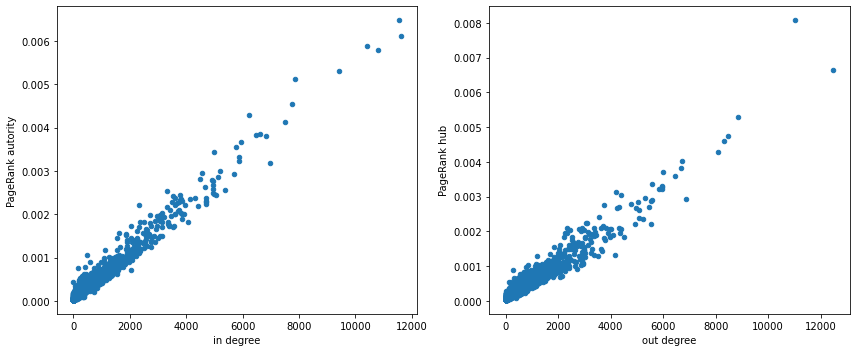

Top 10 for PageRank hub


,Nodes,PageRank hub
3831,UNIVERSIDAD DE GRANADA,0.008073
4499,ALMA MATER STUDIORUM - UNIVERSITA DI BOLOGNA,0.006650
4861,UNIVERSITAT DE VALENCIA,0.005288
5125,UNIVERSIDAD COMPLUTENSE DE MADRID,0.004742
1653,UNIVERSITA DEGLI STUDI DI PADOVA,0.004605
6734,UNIVERSITA DEGLI STUDI DI ROMA LA SAPIENZA,0.004285
2877,UNIVERSIDAD DEL PAIS VASCO/ EUSKAL HERRIKO UNI...,0.004039
4495,UNIVERSITA DEGLI STUDI DI TORINO,0.003837
1496,UNIVERZA V LJUBLJANI,0.003712
677,UNIVERSIDAD POLITECNICA DE MADRID,0.003598


Top 10 for PageRank autority


,Nodes,PageRank autority
4499,ALMA MATER STUDIORUM - UNIVERSITA DI BOLOGNA,0.006472
4861,UNIVERSITAT DE VALENCIA,0.006109
5912,UNIVERSIDADE DE LISBOA,0.005881
3831,UNIVERSIDAD DE GRANADA,0.005778
5125,UNIVERSIDAD COMPLUTENSE DE MADRID,0.005299
5591,UNIVERSITAT POLITECNICA DE VALENCIA,0.005129
1496,UNIVERZA V LJUBLJANI,0.004541
3784,POLITECNICO DI MILANO,0.004299
810,KATHOLIEKE UNIVERSITEIT LEUVEN,0.004136
3565,UNIVERSITAT DE BARCELONA,0.003863


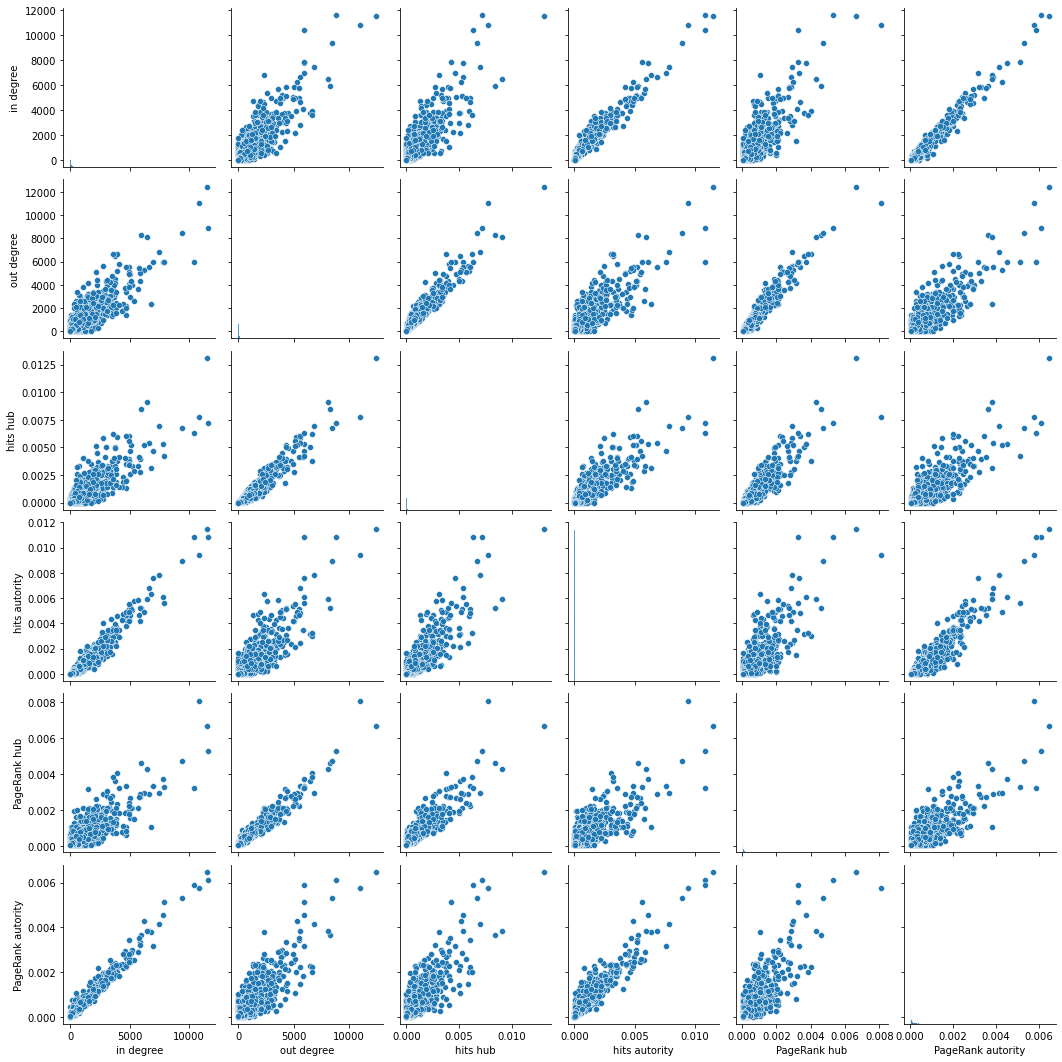

In [28]:
df = ns.pagerank_alg(adj_matrix_crs, nodes_df, score_df=scores, print_graph=True)
scores = pd.merge(scores, df, on='Nodes')

ns.display_top_n(scores, 10, 'PageRank hub')
ns.display_top_n(scores, 10, 'PageRank autority')
# ci vuole troppo a farlo
sns.pairplot(scores[['in degree', 'out degree',  'hits hub',
       'hits autority', 'PageRank hub', 'PageRank autority']])
plt.show()
# from IPython.display import Image
# Image('pairplot_score.png',)

### Assortativity

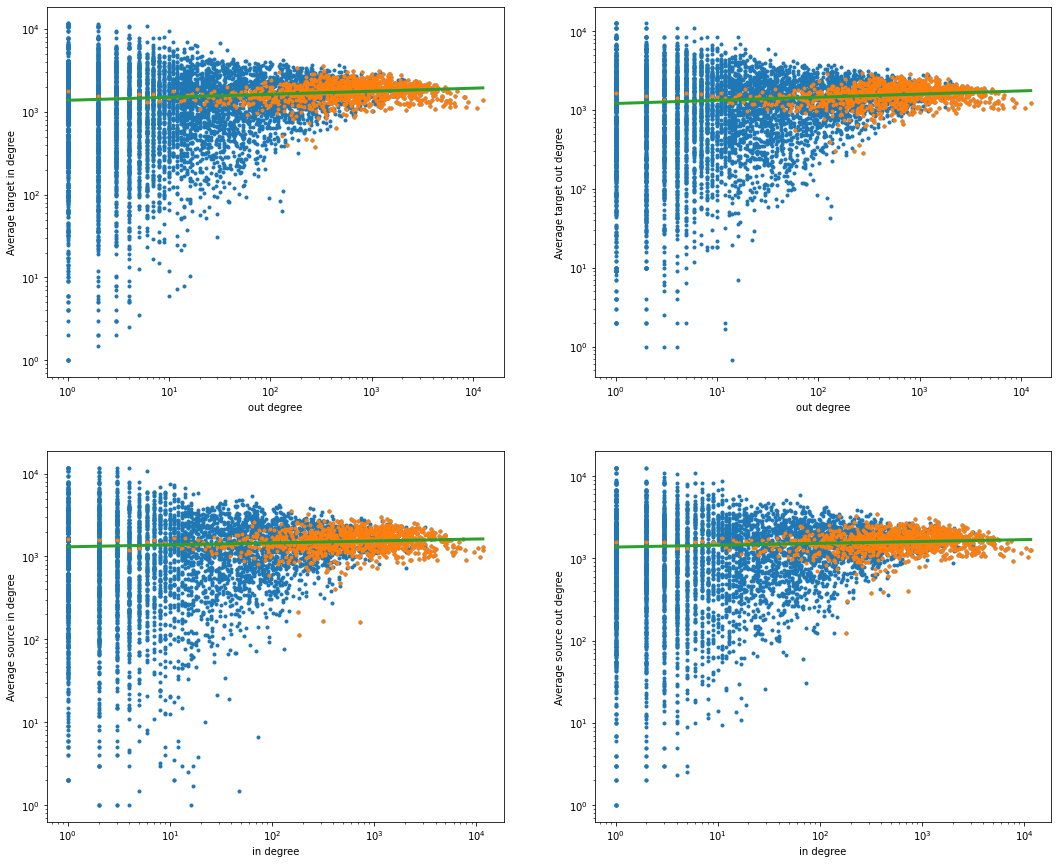

(0.03640513833878802,
 0.03978985392617849,
 0.02346311267528153,
 0.0225624509545072)

In [29]:
edges = mobility_df.copy()
ns.assortativity_calc(edges, adj_matrix_crs, nodes_df, True)

## Communities

In [30]:
import networkx as nx

# G = nx.convert_matrix.from_scipy_sparse_matrix(adj_matrix_crs)
G = nx.convert_matrix.from_scipy_sparse_matrix(adj_matrix_crs, create_using= nx.DiGraph)
p = nx.algorithms.community.modularity_max.greedy_modularity_communities(G)
node_comm = nodes_df.copy()
node_comm.drop(columns=['NodeID'], inplace=True)

node_comm['Community']=np.zeros(len(node_comm.index),dtype='int8')
for i, set in enumerate(p):
    for element in set:
        node_comm.iat[element, 1]=i
for i, set in enumerate(p):
    display(node_comm[node_comm['Community']==i])
    
scores['uni_Community'] = node_comm['Community']
# 52 communities. Choose if it makes sense to reduce the number of them 

,Nodes,Community
0,SIGMA CLERMONT,0
2,UNIVERSIDAD NACIONAL DE GUINEA ECUATORIAL,0
5,VISOKA SOLA ZA TEHNOLOGIJO POLIMEROV,0
6,ALEXANDREIO TECHNOLOGIKO EKPAIDEITIKO IDRYMA T...,0
9,BILRA INSTITUTE OF MANAGEMENT TECHNOLOGY,0
...,...,...
7100,HOCHSCHULE FUR TECHNIK STUTTGART,0
7103,CITE DU DESIGN-ECOLE SUPERIEURE D'ART ET DE DE...,0
7105,NATIONAL UNIVERSITY OF UKRAINE ON PHYSICAL EDU...,0
7107,KTO KARATAY UNIVERSITY,0


,Nodes,Community
1,UNIWERSYTET JAGIELLONSKI,1
3,SIHTASUTUS ESTONIAN BUSINESS SCHOOL,1
8,TRUONG DAI HOC KHOA HOC XA HOI VA NHAN VAN,1
10,UNIVERSITY OF WORLD ECONOMY AND DIPLOMACY,1
15,ECOLE NATIONALE SUPÉRIEURE DE PAYSAGE DE VERSA...,1
...,...,...
7102,SZEGEDI TUDOMANYEGYETEM,1
7104,UMEA UNIVERSITET,1
7106,GRODNO STATE MEDICAL UNIVERSITY,1
7108,R.B. SULEIMENOV INSTITUTE OF ORIENTAL STUDIES ...,1


,Nodes,Community
4,CONSERVATORIO SAN PIETRO A MAJELLA,2
20,"CONSERVATORIO DI MUSICA ""ARRIGO PEDROLLO"" DI V...",2
34,JOSEPH HAYDN KONSERVATORIUM DES LANDES BURGENLAND,2
59,PETRA FOR EDUCATION,2
73,UNIVERSIDAD DE LA REPUBLICA,2
...,...,...
7087,INSTITUT D'ETUDES SUPÉRIEURES DES ART,2
7088,CONSERVATOIRE NATIONAL SUPÉRIEUR D'ART DRAMATIQUE,2
7089,"CONSERVATORIO STATALE DI MUSICA ""BRUNO MADERNA""",2
7094,SAINT-PETERSBURG UNIVERSITY OF MANAGEMENT TECH...,2


,Nodes,Community
40,KILIMANJARO CHRISTIAN MEDICAL UNIVERSITY COLLEGE,3
41,UNIVERSITATEA LUCIAN BLAGA DIN SIBIU,3
52,LYCÉE JULES GUESDE,3
76,CUMHURIYET UNIVERSITESI,3
88,PROVÍNCIA PORTUGUESA DAS IRMÃS DE SÃO JOSÉ DE ...,3
...,...,...
6979,WYZSZA SZKOLA FILOLOGICZNA WE WROCLAWIU,3
6996,FORTH VALLEY COLLEGE OF FURTHER AND HIGHER EDU...,3
7004,FONDAZIONE ISTITUTO TECNICO SUPERIORE PER LE N...,3
7030,FEDERAL STATE AUTONOMOUS EDUCATIONAL INSTITUTI...,3


,Nodes,Community
7,UNIVERSIDADE FEDERAL DE OURO PRETO,4
21,"VISOKA SKOLA ""LOGOS CENTAR"" U MOSTARU",4
57,SCOALA NATIONALA DE STUDII POLITICE SI ADMINIS...,4
113,KARSHI ENGINEERING ECONOMICS INSTITUTE,4
118,STATE HIGHER EDUCATIONAL INSTITUTION KYIV NATI...,4
...,...,...
6912,I.E.S. POLITÉCNICO DE VIGO,4
6921,LEBANESE INTERNATIONAL UNIVERSITY,4
6943,UNIVERSITET ALEKSANDER XHUVANI ELBASAN,4
6969,UNIVERSIDAD DE COLIMA,4


,Nodes,Community
24,FACOLTÀ VALDESE DI TEOLOGIA,5
38,NEAPOLIS UNIVERSITY,5
141,KÁROLI GÁSPÁR REFORMÁTUS EGYETEM,5
234,EVANGÉLIKUS HITTUDOMÁNYI EGYETEM,5
296,FREIE THEOLOGISCHE HOCHSCHULE GIESSEN,5
...,...,...
6285,MANDALAY TECHNOLOGICAL UNIVERSITY,5
6497,HAKKARI UNIVERSITESI,5
6700,NATIONAL DRAGOMANOV PEDAGOGICAL UNIVERSITY OF ...,5
6731,MILTON FRIEDMAN EGYETEM,5


,Nodes,Community
392,HOCHSCHULE GEISENHEIM,6
528,"NATIONAL UNIVERSITY CORPORATION, KYOTO UNIVERSITY",6
593,UNIVERSIDAD TÉCNICA DEL NORTE,6
804,ISET POLICY INSTITUTE,6
809,AGRICULTURAL UNIVERSITY OF GEORGIA,6
...,...,...
6156,REGIE ECOLE SUPERIEURE DE PHYSIQUE ET DE CHIMI...,6
6246,UNIVERZA V NOVI GORICI,6
6370,UNIVERSIDAD PUBLICA DE NAVARRA,6
6670,CHAMBRE DE COMMERCE ET D'INDUSTRIEDE REGION PA...,6


,Nodes,Community
2867,ISTANBUL SABAHATTIN ZAIM UNIVERSITY,7
3785,MIDDLE EAST UNIVERSITY,7
4112,ISLAMIC UNIVERSITY OF APPLIED SCIENCES ROTTERDAM,7
4886,UNIVERSITE IBNOU ZOHR A AGADIR,7
4918,UNIVERSITE ALQUARAOUIYINE,7
5307,INTERNATIONAL CENTRE FOR EDUCATION IN ISLAMIC ...,7
5562,UNIVERSITE EZ-ZITOUNA,7


,Nodes,Community
1191,IES MARIA DE ZAYAS Y SOTOMAYOR,8
2910,CENTRE INTEGRAL DE FP ILERNA S.L.,8
2945,IES HOTEL ESCUELA,8
3000,SOUTH WEST COLLEGE,8
6766,FONDAZIONE ISTITUTO TECNICO SUPERIORE PER TECN...,8
6984,LYCÉE DES MÉTIERS DE L'HÔTELLERIE ET DU TOURIS...,8
7033,CENTRO INTEGRAL DE FP ILERNA S.L.,8


,Nodes,Community
1071,EESTI EVANGEELIUMI KRISTLASTE JA BAPTISTIDE KO...,9
1292,KAREN BAPTIST THEOLOGICAL SEMINARY,9
2327,LONDON SCHOOL OF THEOLOGY,9
3914,ANSGAR TEOLOGISKE HØGSKOLE,9
5284,ÖREBRO SCHOOL OF THEOLOGY,9
5964,AKADEMI FÖR LEDARSKAP OCH TEOLOGI,9


,Nodes,Community
207,BAIKAL STATE UNIVERSITY,10
1880,IRKUTSK STATE UNIVERSITY,10
3174,HOCHSCHULE ZITTAU/GOERLITZ,10
5302,SAINT PETERSBURG NATIONAL RESEARCH UNIVERSITY ...,10
5339,SAINT PETERSBURG NATIONAL RESEARCHUNIVERSITY O...,10


,Nodes,Community
541,VISOKA POSLOVNA STRUKOVNIH SKOLA STDIJA U NOVO...,11
1469,"FAKULTETA ZA UPRAVLJANJE, POSLOVANJE IN INFORM...",11
4002,VISOKA SKOLA ZA MENADZMENT U TURIZMU I INFORMA...,11
4361,COLLEGE OF PROFESSIONAL STUDIES IN MANAGEMENT ...,11
6451,VISOKA SOLA ZA UPRAVLJANJE IN POSLOVANJE NOVO ...,11


,Nodes,Community
288,INSTITUT RÉGIONAL DU TRAVAIL SOCIAL NORMANDIE ...,12
5044,HAUTE ECOLE BRUXELLES-BRABANT (HE2B),12
5252,INSTITUT RÉGIONAL DU TRAVAIL SOCIAL DE CHAMPAG...,12
6448,HAUTE ECOLE PAUL-HENRI SPAAK,12


,Nodes,Community
182,WSZECHNICA POLSKA SZKOLA WYZSZA W WARSZAWIE,13
391,PUSHKIN STATE RUSSIAN LANGUAGE INSTITUTE,13
3050,UNIVERSIDAD NACIONAL ARTURO JAURETCHE,13


,Nodes,Community
2391,ECOLE INTERNATIONALE DES SCIENCES DU TRAITEMEN...,14
4304,NOVOSIBIRSK STATE UNIVERSITY,14
4788,STATE EDUCATIONAL INSTITUTION OF HIGHER PROFES...,14


,Nodes,Community
826,LYCEE OZENNE,15
2931,LYCÉE GEORGES DUBY,15
5215,INSTITUT JOAN BROSSA,15


,Nodes,Community
508,INSTITUT NATIONAL AGRONOMIQUE DE TUNISIE,16
1062,LEBANESE UNIVERSITY,16
5217,CENTRE INTERNATIONAL DES HAUTES ETUDES AGRONOM...,16


,Nodes,Community
2051,ESCOLA NAVAL,17
4867,UNITED STATES NAVAL ACADEMY,17
5471,ECOLE NAVALE GROUPEMENT INTERET PUBLIC,17


,Nodes,Community
2952,UNIVERSIDAD TECNOLOGICA DE EL SALVADOR,18
3977,EUROPEAN UNIVERSITY - REPUBLIC OF MACEDONIA,18
5668,ACADEMIA DRUZBA ZA STORITVE DOO,18


,Nodes,Community
1525,KYIV THEOLOGICAL ACADEMY AND SEMINARY OF UKRAI...,19
1563,ANOTATI ECCLESIASTIKI AKADEMIA THESSALONIKIS,19
6659,RELIGIOUS ORGANIZATION OF HIGHER THEOLOGICAL E...,19


,Nodes,Community
3133,ASTRAKHAN STATE UNIVERSITY,20
6359,"INSTITUT SUPÉRIEUR DE L'EDUCATION SPÉCIALISÉE,...",20
6733,INSTITUT NATIONAL SUPERIEUR DE FORMATION ET DE...,20


,Nodes,Community
2222,LYCÉE GÉNÉRAL ET TECHNOLOGIQUE JEAN MACE,21
2326,LYCEE LOUISE MICHEL,21
7093,INS JOAQUIM MIR,21


,Nodes,Community
2203,ESCUELA DE ARTE Y SUPERIOR DE CONSERVACIÓN Y R...,22
2345,ACCADEMIA DI BELLE ARTI ALDO GALLI - I.L.E.M. SRL,22


,Nodes,Community
2562,EPLEFPA LOT ET GARONNE,23
4040,INSTITUTO DE EDUCACIÓN SECUNDARIA JUAN CARLOS I,23


,Nodes,Community
764,VANCOUVER ISLAND UNIVERSITY,24
4171,INSTITUTO DE EDUCACIÓN SECUNDARIA HOZGARGANTA,24


,Nodes,Community
3153,SUD MANAGEMENT,25
4855,ACCOUNTANCY & BUSINESS COLLEGE (IRELAND) LIMIT...,25


,Nodes,Community
3997,MF VITENSKAPELIG HØYSKOLE,26
5241,PACIFIC LUTHERAN UNIVERSITY,26


,Nodes,Community
847,UNIVERSITY OF GUELPH NON-PROFIT CORPORATION,27
5373,HOLAR UNIVERSITY COLLEGE,27


,Nodes,Community
4785,"ISTITUTO SUPERIORE DI STUDI MUSICALI ""TOSCANINI""",28
5382,PETROZAVODSK STATE GLAZUNOV CONSERVATOIRE,28


,Nodes,Community
5041,"VYSOKA SKOLA EVROPSKYCH A REGIONALNICH STUDII,...",29
5883,STREDOEUROPSKA VYSOKA SKOLA V SKALICI,29


,Nodes,Community
1777,ESCOLA MUNICIPAL D'ART I DISSENY DE TERRASSA,30
5983,ISTITUTO DI CULTURA PANTHEON S.R.L.,30


,Nodes,Community
1247,VYSOKA SKOLA DANUBIUS S.R.O.,31
5993,VOLGA STATE UNIVERSITY OF TECHNOLOGY,31


,Nodes,Community
426,PRIVATUNIVERSITÄT SCHLOSS SEEBURG,32
5995,HOCHSCHULE FÜR ANGEWANDTES MANAGEMENT GMBH,32


,Nodes,Community
887,EVANGELISCHE HOCHSCHULE FÜR KIRCHENMUSIK TÜBINGEN,33
6415,ERSTA SKÖNDAL BRÄCKE HÖGSKOLA,33


,Nodes,Community
1601,MEHRABYAN MEDICAL INSTITUTE IN YEREVAN,34
6459,DAUGAVPILS MEDICAL COLLEGE,34


,Nodes,Community
5107,COLLEGE OF APPLIED SCIENCES LAVOSLAV RUZICKA I...,35
6581,"SVEUČILIŠTE/UNIVERZITET ""VITEZ"" VITEZ",35


,Nodes,Community
5529,AMERICAN UNIVERSITY OF SCIENCE AND TECHNOLOGY,36
6605,YNCRÉA HAUTS DE FRANCE ISEN-LILLE,36


,Nodes,Community
2932,"VYSOKA SKOLA EVROPSKYCH A REGIONALNICH STUDII,...",37
6846,DUBNICKY TECHNOLOGICKY INSTITUT V DUBNICKI NAD...,37


,Nodes,Community
2804,THE MAXIM GORKY LITERARY INSTITUTE,38
7031,FONDAZIONE UNICAMPUS SAN PELLEGRINO,38


,Nodes,Community
2857,PAVLO TYCHYNA UMAN STATE PEDAGOGICAL UNIVERSITY,39
7035,PANSTWOWA WYZSZA SZKOLA ZAWODOWA IM. HIPOLITA ...,39


,Nodes,Community
3556,LYCEE AMPERE,40
7062,INSTITUT POBLENOU,40


,Nodes,Community
2290,UNIVERSITY OF THE PUNJAB,41


## Geographical heatmap

In [31]:
city

NameError: name 'city' is not defined

In [32]:
temp_df = uni_cities[['target', 'Receiving City']].copy()
temp_df.rename({'target':'source', 'Receiving City':'Sending City'},axis=1, inplace=True)
cities_uni = pd.concat([uni_cities[['source', 'Sending City']], temp_df]).drop_duplicates().reset_index(drop=True)
cities_uni.dropna(subset=['Sending City'], inplace=True)

for index in range(cities_uni.shape[0]):
    city = cities_uni.iat[index,1]
    if city != city.upper():
        cities_uni.iat[index,1] = city.upper()
cities_uni = cities_uni.drop_duplicates().reset_index(drop=True)
cities_uni = cities_uni.drop_duplicates(subset='source').reset_index(drop=True)

# assigning cities to each university in scores
cities_list = []
for u in scores['Nodes']:
    cities_list.append(list(cities_uni.loc[cities_uni['source'] == u, 'Sending City'])[0])

scores_cities = scores.copy()
scores_cities['City'] = cities_list

scores_cities

,Nodes,NodeID_x,in degree,out degree,NodeID_y,hits hub,hits autority,NodeID,PageRank hub,PageRank autority,uni_Community,City
0,SIGMA CLERMONT,0,24,157,0,1.450320e-04,1.946983e-05,0,0.000103,0.000036,0,AUBIERE CEDEX
1,UNIWERSYTET JAGIELLONSKI,1,4700,3395,1,3.494232e-03,4.233049e-03,1,0.001892,0.002309,1,KRAKOW
2,UNIVERSIDAD NACIONAL DE GUINEA ECUATORIAL,2,0,1,2,9.737737e-07,0.000000e+00,2,0.000030,0.000027,0,MALABO
3,SIHTASUTUS ESTONIAN BUSINESS SCHOOL,3,49,106,3,5.702581e-05,3.202452e-05,3,0.000068,0.000048,1,HARJU MAAKOND TALLINN
4,CONSERVATORIO SAN PIETRO A MAJELLA,4,5,15,4,1.462106e-07,3.547767e-08,4,0.000055,0.000032,2,NAPOLI
...,...,...,...,...,...,...,...,...,...,...,...,...
7108,R.B. SULEIMENOV INSTITUTE OF ORIENTAL STUDIES ...,7108,0,4,7108,4.765147e-06,0.000000e+00,7108,0.000031,0.000027,1,ALMATY
7109,WASHINGTON STATE UNIVERSITY,7109,3,0,7109,0.000000e+00,3.019006e-06,7109,0.000029,0.000028,1,RICHLAND
7110,JINGGANGSHAN UNIVERSITY,7110,1,15,7110,2.479184e-06,6.660258e-07,7110,0.000045,0.000027,4,JIAN
7111,INSTITUTO POLITECNICO DE BEJA,7111,182,181,7111,6.187876e-05,7.803190e-05,7111,0.000166,0.000199,0,BEJA


In [33]:
city_coord = pd.read_csv('worldcities.csv', encoding='utf8')
city_coord.drop(columns=['capital', 'population', 'id', 'iso3', 'country'], inplace=True)
for index in range(city_coord.shape[0]):
    city = city_coord.iat[index,0]
    if city != city.upper():
        city_coord.iat[index,0] = city.upper()
city_coord = city_coord.drop_duplicates().reset_index(drop=True)
scores_cities = pd.merge(left=scores_cities, right=city_coord, how='left', left_on='City', right_on='city')
scores_cities.dropna(subset=['city'], inplace=True)
scores_cities = scores_cities.drop_duplicates(subset='Nodes').reset_index(drop=True)
scores_cities

# some cities are missing like Milano, Torino, Madrid (these are also pretty much important)

,Nodes,NodeID_x,in degree,out degree,NodeID_y,hits hub,hits autority,NodeID,PageRank hub,PageRank autority,uni_Community,City,city,city_ascii,lat,lng,iso2,admin_name
0,UNIVERSIDAD NACIONAL DE GUINEA ECUATORIAL,2,0,1,2,9.737737e-07,0.000000e+00,2,0.000030,0.000027,0,MALABO,MALABO,Malabo,3.7521,8.7737,GQ,Bioko Norte
1,VISOKA SOLA ZA TEHNOLOGIJO POLIMEROV,5,3,1,5,3.389595e-08,3.382953e-07,5,0.000030,0.000028,0,SLOVENJ GRADEC,SLOVENJ GRADEC,Slovenj Gradec,46.5093,15.0790,SI,Slovenj Gradec
2,TRUONG DAI HOC KHOA HOC XA HOI VA NHAN VAN,8,1,5,8,8.219816e-07,1.088874e-06,8,0.000039,0.000028,1,HANOI,HANOI,Hanoi,21.0245,105.8412,VN,Hà Nội
3,UNIVERSITY OF WORLD ECONOMY AND DIPLOMACY,10,0,4,10,4.073031e-06,0.000000e+00,10,0.000033,0.000027,1,TASHKENT,TASHKENT,Tashkent,41.3000,69.2667,UZ,Toshkent
4,KAZAKH NATIONAL TECHNICAL UNIVERSITY AFTER K.I...,11,0,16,11,6.265330e-06,0.000000e+00,11,0.000035,0.000027,0,ALMATY,ALMATY,Almaty,43.2500,76.9000,KZ,Almaty
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4935,KTO KARATAY UNIVERSITY,7107,5,215,7107,2.446390e-05,2.915382e-08,7107,0.000119,0.000045,0,KONYA,KONYA,Konya,37.8714,32.4847,TR,Konya
4936,R.B. SULEIMENOV INSTITUTE OF ORIENTAL STUDIES ...,7108,0,4,7108,4.765147e-06,0.000000e+00,7108,0.000031,0.000027,1,ALMATY,ALMATY,Almaty,43.2500,76.9000,KZ,Almaty
4937,WASHINGTON STATE UNIVERSITY,7109,3,0,7109,0.000000e+00,3.019006e-06,7109,0.000029,0.000028,1,RICHLAND,RICHLAND,Richland,46.2824,-119.2938,US,Washington
4938,INSTITUTO POLITECNICO DE BEJA,7111,182,181,7111,6.187876e-05,7.803190e-05,7111,0.000166,0.000199,0,BEJA,BEJA,Beja,38.0333,-7.8833,PT,Beja


Importing geographic data also for countries

In [34]:
import geopandas as gpd
import pycountry as pc #library used for translating country codes from iso3 to iso2 standard

geo_df = gpd.read_file('countries.geojson')

def replace_iso2(alpha):
    try:
        return pc.countries.get(alpha_3=alpha).alpha_2
    except:
        return alpha
    
geo_df['iso2_code']= (np.array(list(map(lambda x: replace_iso2(x), geo_df['ISO_A3']))))

geo_df.columns = ['country', 'country_code', 'geometry', 'iso2_code']

# in geo_df United Kingdom has code GB, so we have to change it manually
# geo_df.loc[geo_df['country'] == 'United Kingdom', 'iso2_code'] = 'UK'
# geo_df.loc[geo_df['country'] == 'Greece', 'iso2_code'] = 'EL'
geo_df.loc[geo_df['country'] == 'Kosovo', 'iso2_code'] = 'XK'
geo_df.loc[geo_df['country'] == 'Czech Republic', 'country'] = 'Czechia'
geo_df.loc[geo_df['country'] == 'Republic of Serbia', 'country'] = 'Serbia'

# merge geometries with our dataframe
geo_scores = pd.merge(left=scores_cities, right=geo_df[['iso2_code', 'geometry']], how='left', 
                      left_on='iso2', right_on='iso2_code')
geo_scores = geo_scores[['Nodes', 'PageRank hub', 'PageRank autority', 'City', 'lat', 'lng',
                         'iso2', 'geometry', 'uni_Community']]

Dividing universities by their country community

In [35]:
import networkx as nx

### 1 create the network of countries only
country_df = c_df[c_df[c_df.columns[10]]=='Learner']
country_df = country_df.loc[:, c_df.columns[np.array((14, 17, 20))]]
country_df.dropna(how='any', inplace=True)

# c_nodes = np.array(list(set.union(set(country_df.loc[:, country_df.columns[0]]), set(country_df.loc[:, country_df.columns[1]]))))
c_nodes = np.array(list(pd.concat([country_df.loc[:, country_df.columns[0]], country_df.loc[:, country_df.columns[1]]]).drop_duplicates()))
country_df.dropna(how='any', inplace=True)

c_node_position = {}
for i, name in enumerate(c_nodes):
    c_node_position[name] = i
country_nodes= pd.DataFrame({'Nodes': c_nodes})
country_df['SendId'] = (np.array(list(map(lambda x: c_node_position[x], country_df['Sending Country Code']))))
country_df['RecId'] = (np.array(list(map(lambda x: c_node_position[x], country_df['Receiving Country Code']))))

# Adjacency matrix
country_serie = country_df.groupby(['SendId', 'RecId']).sum()
row = np.array(country_serie.index.get_level_values(1).tolist())
col = np.array(country_serie.index.get_level_values(0).tolist())
val = country_serie.values
c_adj_matrix = sparse.csr_matrix((val.flatten(), (row, col)), shape=(c_nodes.size, c_nodes.size))

### 2 countries community
# G_country = nx.convert_matrix.from_scipy_sparse_matrix(c_adj_matrix)
G_country = nx.convert_matrix.from_scipy_sparse_matrix(c_adj_matrix, create_using= nx.DiGraph)
p_c = nx.algorithms.community.modularity_max.greedy_modularity_communities(G_country)
country_comm = country_nodes.copy()
# some countries have a different code
country_comm.loc[country_comm['Nodes'] == 'UK', 'Nodes'] = 'GB'
country_comm.loc[country_comm['Nodes'] == 'EL', 'Nodes'] = 'GR'

country_comm['Community']=np.zeros(len(country_comm.index),dtype='int8')
for i, set in enumerate(p_c):
    for element in set:
        country_comm.iat[element, 1]=i
for i, set in enumerate(p_c):
    display(country_comm[country_comm['Community']==i])

geo_scores = pd.merge(left=geo_scores, right=country_comm, how='left', left_on='iso2', right_on='Nodes')

,Nodes,Community
1,IT,0
2,AT,0
6,ET,0
10,TH,0
11,KG,0
...,...,...
145,BI,0
149,MR,0
150,PA,0
151,BB,0


,Nodes,Community
0,EE,1
3,CN,1
4,RU,1
5,CU,1
7,RS,1
...,...,...
134,SK,1
146,BN,1
147,TL,1
148,BW,1


,Nodes,Community
22,UZ,2
38,BF,2
51,FR,2
74,NE,2
79,SG,2
...,...,...
130,SE,2
131,ZW,2
133,VE,2
138,CI,2


,Nodes,Community
29,BE,3
41,CD,3
45,SR,3
47,AL,3
62,DO,3
63,XK,3
68,BJ,3
82,KH,3
118,LT,3
137,GM,3


Focus on european countries

In [36]:
eu_countries = ['Germany', 'United Kingdom', 'France', 'Italy', 'Spain', 'Ukraine', 'Poland', 'Romania', 
                'Netherlands', 'Belgium', 'Czechia', 'Greece', 'Portugal', 'Sweden', 'Hungary', 
                'Belarus', 'Austria', 'Serbia', 'Switzerland', 'Bulgaria', 'Denmark', 'Finland', 'Slovakia', 'Norway',
                'Ireland', 'Croatia', 'Moldova', 'Bosnia and Herzegovina', 'Albania', 'Lithuania', 'Macedonia', 
                'Slovenia', 'Latvia', 'Estonia', 'Montenegro', 'Luxembourg', 'Malta', 'Iceland', 'Andorra', 'Monaco', 
                'Liechtenstein', 'Kosovo', 'Turkey']

def replace_iso3166(alpha):
    try:
        return pc.countries.get(name=alpha).alpha_2
    except:
        return alpha
    
eu_countries_iso2 = list(map(lambda x: replace_iso3166(x), eu_countries))

geo_scores = geo_scores[geo_scores['iso2'].isin(eu_countries_iso2)]

In [37]:
colors = ['red', 'blue', 'green', 'orange', 'purple', 'grey']
cmaps = ['Reds_r', 'Blues_r', 'Greens_r', 'Wistia_r', 'Purples_r', 'Greys_r']

fig, ax = plt.subplots(figsize=(20,15))

for c in range(6):
    temp_df = geo_scores[geo_scores['Community'] == c].copy()
    temp_df = gpd.GeoDataFrame(temp_df, geometry = 'geometry')
    temp_df.plot(ax=ax, edgecolor='0.5', linewidth=0.3, color=colors[c], alpha=0.01)
    ax.scatter(x=temp_df['lng'], y=temp_df['lat'], s=temp_df['PageRank hub']*10**4, c=temp_df['PageRank hub'],
                  cmap=cmaps[c])
ax.axis('off')

plt.savefig('countries_communities & universities_hubs.png')

fig, ax = plt.subplots(figsize=(20,15))

for c in range(6):
    temp_df = geo_scores[geo_scores['Community'] == c].copy()
    temp_df = gpd.GeoDataFrame(temp_df, geometry = 'geometry')
    temp_df.plot(ax=ax, edgecolor='0.5', linewidth=0.3, color=colors[c], alpha=0.01)
    ax.scatter(x=temp_df['lng'], y=temp_df['lat'], s=temp_df['PageRank autority']*10**4, c=temp_df['PageRank autority'],
                  cmap=cmaps[c])
ax.axis('off')

plt.savefig('countries_communities & universities_authorities.png')

C:\Users\gianm\anaconda3\lib\site-packages\geopandas\plotting.py:678: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(
C:\Users\gianm\anaconda3\lib\site-packages\geopandas\plotting.py:678: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(


ValueError: cannot convert float NaN to integer

### Universities communities geographic plot

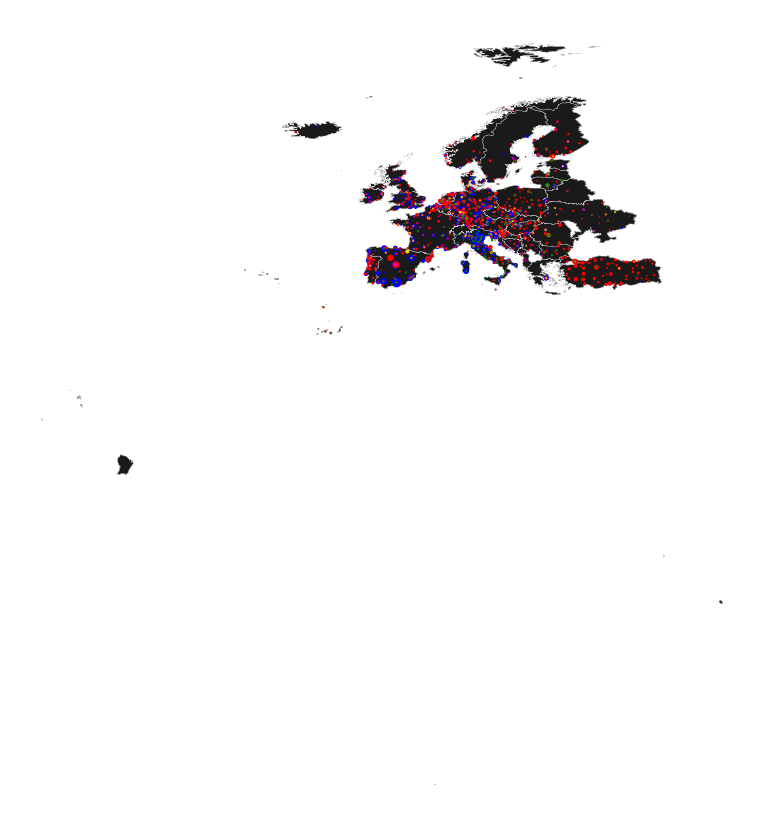

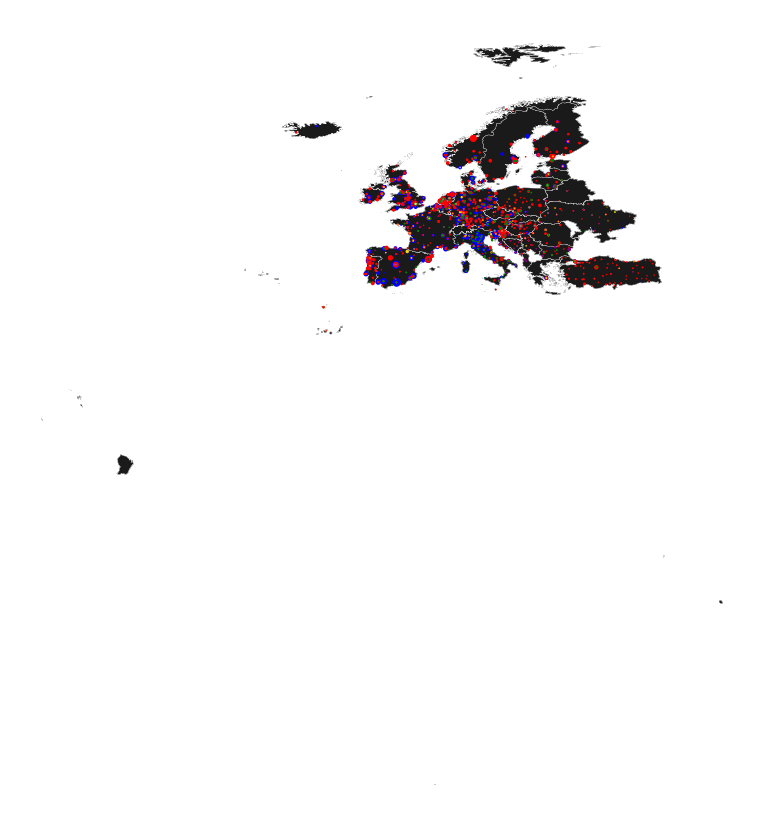

In [ ]:
colors = ['red', 'blue', 'green', 'orange', 'purple', 'grey', 'gold', 'aqua', 'fuchsia', 'pink', 'yellow', 'salmon', 
          'khaki', 'brown', 'lime', 'skyblue', 'peachpuff', 'ivory', 'powderblue', 'rosybrown', 'royalblue', 
          'saddlebrown', 'salmon', 'sandybrown', 'seagreen', 'seashell', 'sienna', 'silver', 'skyblue', 'slateblue',
          'slategray', 'snow', 'springgreen', 'steelblue', 'tan', 'teal', 'thistle', 'tomato', 'turquoise', 'violet',
          'wheat', 'white', 'whitesmoke', 'yellow', 'yellowgreen', 'lightgreen', 'lightgray', 'lightpink', 'lightsalmon', 
          'lightseagreen', 'lightskyblue', 'lightslategray']

geo_plt = geo_scores.copy()
# dropping all communities containing number of universities lower or equal than 2
for c in range(max(geo_plt['uni_Community'])):
    if geo_plt[geo_plt['uni_Community'] == c].shape[0] <= 2:
        geo_plt = geo_plt[geo_plt['uni_Community'] != c]
geo_plt = gpd.GeoDataFrame(geo_plt, geometry='geometry')

# universities sized on PageRank hub score
fig, ax = plt.subplots(figsize=(20,15))

geo_plt.plot(ax=ax, edgecolor='1', linewidth=0.3, color='0.1')

# sns.scatterplot(x='lng', y='lat', data=geo_plt, hue='uni_Community', legend=False, ax=ax, size=geo_plt['PageRank hub']*10**4)
# ax.scatter(x=geo_plt['lng'], y=geo_plt['lat'], s=geo_plt['PageRank hub']*10**4, c=geo_plt['uni_Community'], cmap='jet')

for c in list(geo_plt['uni_Community'].unique()):
    temp_df = geo_plt[geo_plt['uni_Community'] == c].copy()
    temp_df = gpd.GeoDataFrame(temp_df, geometry = 'geometry')
    # ax.scatter(x=temp_df['lng'], y=temp_df['lat'], s=temp_df['PageRank hub']*10**4, c=temp_df['uni_Community'], cmap='Pastel1')
    # ax.scatter(x=temp_df['lng'], y=temp_df['lat'], s=temp_df['PageRank hub']*10**4, cmap='Pastel1')
    # ax.scatter(x=temp_df['lng'], y=temp_df['lat'], s=temp_df['PageRank hub']*10**4, c=temp_df['uni_Community'])
    ax.scatter(x=temp_df['lng'], y=temp_df['lat'], s=temp_df['PageRank hub']*10**4, color=colors[c])
ax.axis('off')

plt.savefig('universities_communities_hubs.png')

# universities sized on PageRank authority score
fig, ax = plt.subplots(figsize=(20,15))

geo_plt.plot(ax=ax, edgecolor='1', linewidth=0.3, color='0.1')

for c in list(geo_plt['uni_Community'].unique()):
    temp_df = geo_plt[geo_plt['uni_Community'] == c].copy()
    temp_df = gpd.GeoDataFrame(temp_df, geometry = 'geometry')
    ax.scatter(x=temp_df['lng'], y=temp_df['lat'], s=temp_df['PageRank autority']*10**4, color=colors[c])
ax.axis('off')

plt.savefig('universities_communities_authorities.png')

### Robustness

In [ ]:
#attack: removing hubs first
nodes_byhub = scores.sort_values('PageRank hub', ascending=False)['NodeID']
indices = list(nodes_byhub)
uni_df = mobility_df.copy()
GC_frac_a = [1]
for node in indices:
    uni_df = uni_df.loc[(uni_df['sourceID'] != node) & (uni_df['targetID'] != node)]
    temp_serie = uni_df.groupby(['sourceID', 'targetID']).sum()
    row = np.array(temp_serie.index.get_level_values(1).tolist())
    col = np.array(temp_serie.index.get_level_values(0).tolist())
    val = temp_serie.values
    temp_adj = sparse.csr_matrix((val.flatten(), (row, col)), shape=(nodes.size, nodes.size))
    GC_frac_a.append(ns.fraction_in_giant(temp_adj))


In [ ]:
#random node removal
import random
#10 by 10, with average over 10 trials each time
intervals = list(range(10, len(nodes_byhub+1), 10))
uni_df = mobility_df.copy()
GC_frac_r = [1]
for i in intervals:
    i_GC_frac = []
    for j in range(10):
        removed = random.sample(indices, i)
        temp_df = uni_df.loc[~(uni_df['sourceID'].isin(removed) | (uni_df['targetID'].isin(removed)))]
        temp_serie = temp_df.groupby(['sourceID', 'targetID']).sum()
        row = np.array(temp_serie.index.get_level_values(1).tolist())
        col = np.array(temp_serie.index.get_level_values(0).tolist())
        val = temp_serie.values
        temp_adj = sparse.csr_matrix((val.flatten(), (row, col)), shape=(nodes.size, nodes.size))
        i_GC_frac.append(ns.fraction_in_giant(temp_adj))
    GC_frac_r.append(sum(i_GC_frac)/10)

In [ ]:
fig = plt.figure(figsize=(10,6))
plt.plot([i/len(nodes_byhub) for i in range(len(nodes_byhub)+1)], GC_frac_a, label='Targeted attack')
plt.plot([0]+[i/(len(intervals)*10) for i in intervals], GC_frac_r, 'r', label='Random node removal')
plt.plot([0,1], [1,0], 'g', label='linear reference')
plt.xlabel('Fraction of nodes in the giant component', size=14)
plt.ylabel('Fraction of removed nodes', size=14)
plt.title('Robustness', size=20)
plt.legend(fontsize=16)
plt.show()